Project description: We will be developing a system that uses Deep Learning techniques to analyse whether a users movie review is positive or negative. 
https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/data

Data Structure description: Structurally, our data set is pretty simple. It's one CSV file, used both for training and testing containing roughly 50 000 rows.
The CSV file contains two rows. Review and sentiment. The sentiment column contains the values as words, so "positive" and "negative"s

Data description: We are provided with a number of reviews for different movies. The Reviews are Html texts (contain a small amount of markup) that contain a viewers review about a movie they recently watched. The review usually contains a personal opinion about a movie with no structural requirements for the text. 

Lets start with some EDA.
The vast majority of the EDA will be done with code.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from tensorflow import keras

from sklearn.pipeline import Pipeline
import nltk
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import re
from wordcloud import WordCloud


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gofma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gofma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gofma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gofma\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gofma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gofma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


First few rows of the dataset:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Shape of the dataset:
(50000, 2)

Data types of the columns:
review       object
sentiment    object
dtype: object

Checking for missing values:
review       0
sentiment    0
dtype: int64


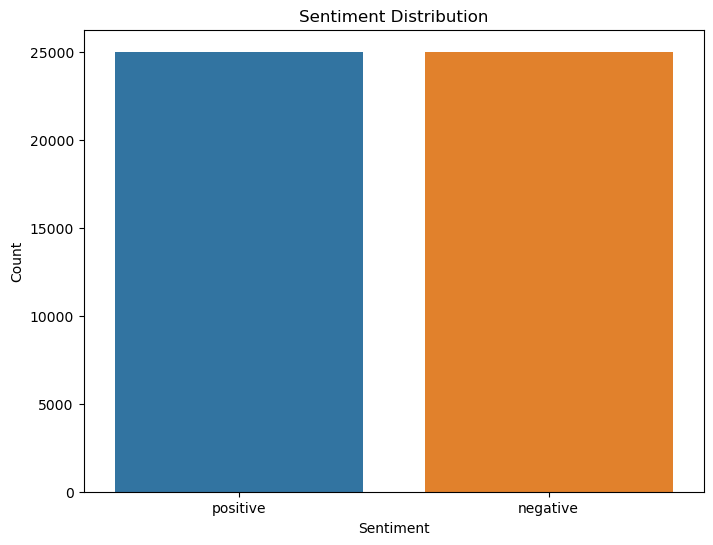

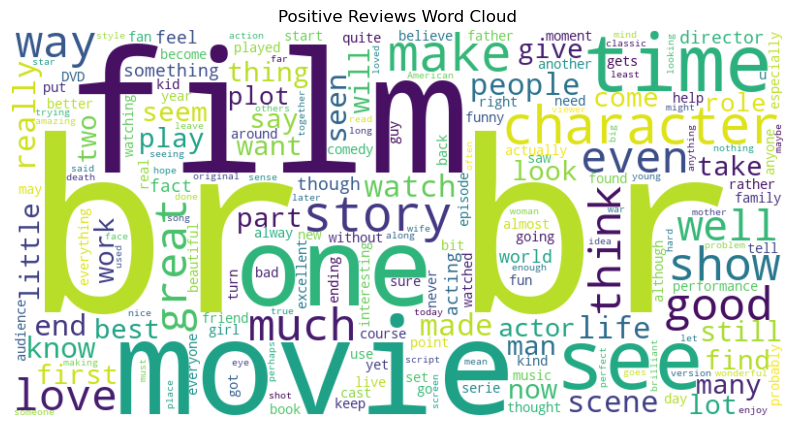

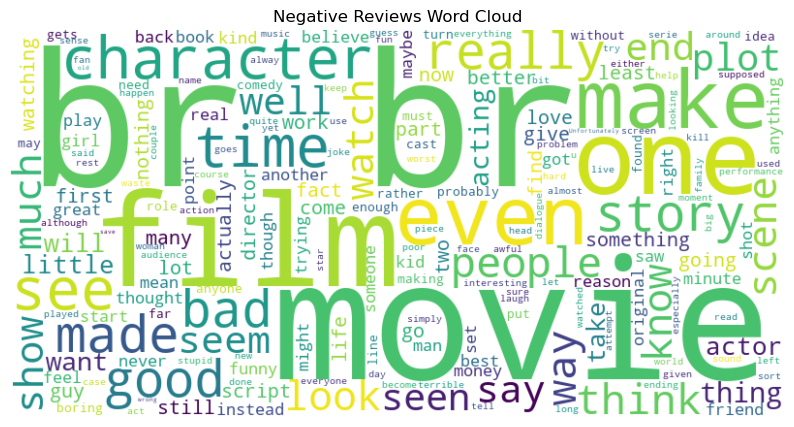


Top words in positive reviews:
[('br', 97954), ('film', 40765), ('movie', 36706), ('one', 26537), ('like', 17231), ('good', 14492), ('great', 12811), ('story', 12531), ('see', 11978), ('time', 11867), ('would', 11251), ('well', 11230), ('also', 10727), ('really', 10713), ('even', 9575), ('much', 9067), ('first', 8979), ('people', 8609), ('love', 8455), ('best', 8350)]

Top words in negative reviews:
[('br', 103997), ('movie', 48364), ('film', 36154), ('one', 25291), ('like', 21952), ('would', 15224), ('even', 15205), ('good', 14275), ('bad', 14223), ('really', 12311), ('time', 11614), ('could', 11342), ('see', 10660), ('get', 10058), ('much', 9953), ('story', 9810), ('people', 9353), ('make', 9010), ('made', 8416), ('first', 8221)]


c:\Users\gofma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


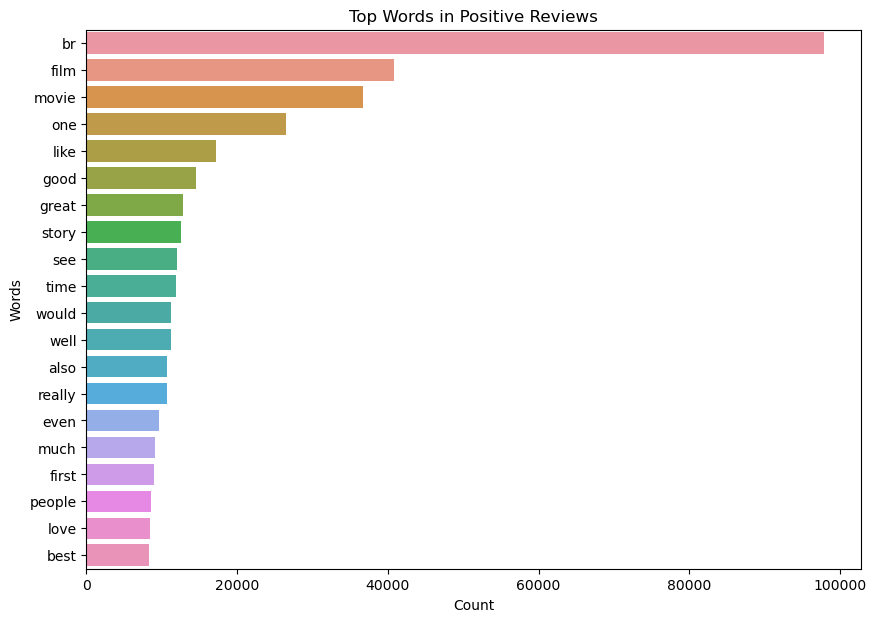

c:\Users\gofma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


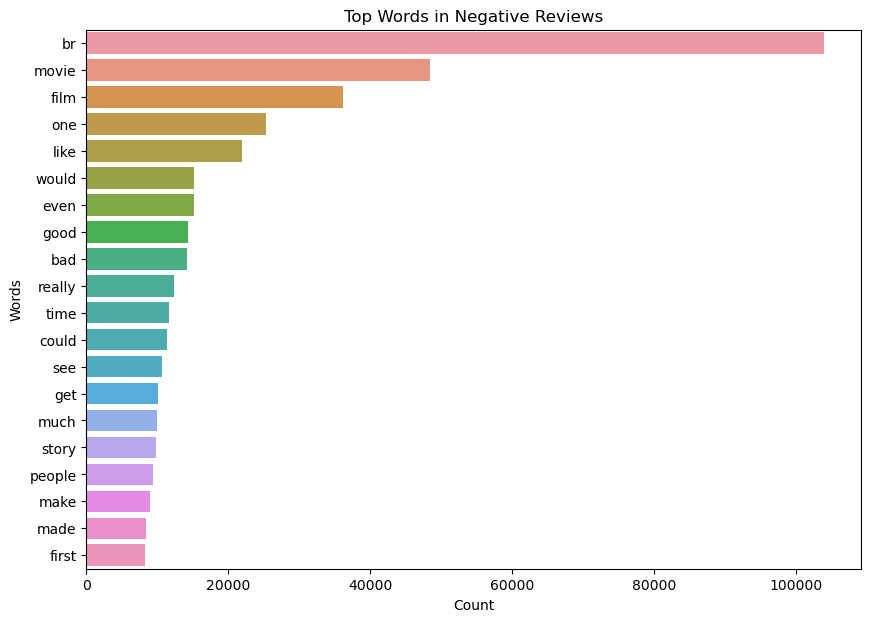

c:\Users\gofma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


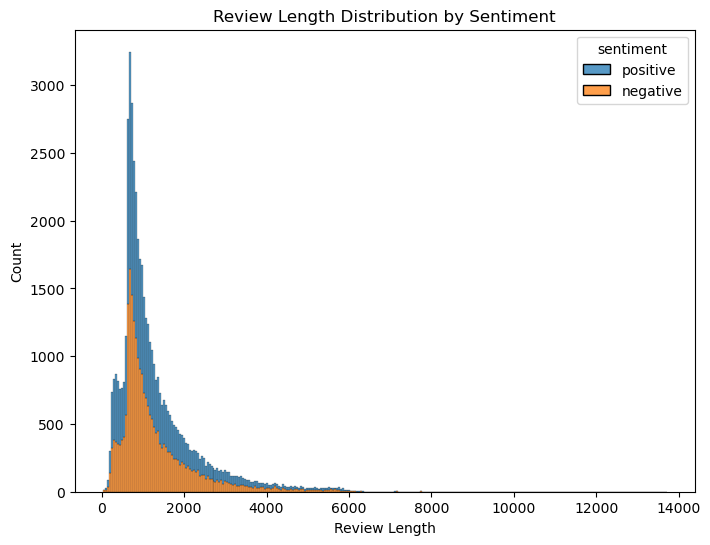

In [2]:

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load the data
file_path = 'imbdDataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Basic Data Exploration
print("First few rows of the dataset:")
print(data.head())

print("\nShape of the dataset:")
print(data.shape)

print("\nData types of the columns:")
print(data.dtypes)

print("\nChecking for missing values:")
print(data.isnull().sum())

# Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Text Analysis
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for each sentiment
positive_reviews = ' '.join(data[data['sentiment'] == 'positive']['review'])
negative_reviews = ' '.join(data[data['sentiment'] == 'negative']['review'])

plot_wordcloud(positive_reviews, 'Positive Reviews Word Cloud')
plot_wordcloud(negative_reviews, 'Negative Reviews Word Cloud')

# Frequency distribution of the top words for each sentiment
stop_words = set(stopwords.words('english'))

def get_top_words(text, n=20):
    words = nltk.word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    word_freq = Counter(words)
    return word_freq.most_common(n)

top_positive_words = get_top_words(positive_reviews)
top_negative_words = get_top_words(negative_reviews)

print("\nTop words in positive reviews:")
print(top_positive_words)

print("\nTop words in negative reviews:")
print(top_negative_words)

# Plotting the top words
def plot_top_words(word_freq, title):
    words, counts = zip(*word_freq)
    plt.figure(figsize=(10, 7))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.show()

plot_top_words(top_positive_words, 'Top Words in Positive Reviews')
plot_top_words(top_negative_words, 'Top Words in Negative Reviews')

# Length Analysis
data['review_length'] = data['review'].apply(len)

plt.figure(figsize=(8, 6))
sns.histplot(data, x='review_length', hue='sentiment', multiple='stack')
plt.title('Review Length Distribution by Sentiment')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

Looking over the EDAs - we can clearly notice the abundance of break tags, that we should remove from the source data prior to working with models.
Lets clean and prepare the data for working with the models. Our Data preprocessing will involve cleaning out html, tokenisation, lowercasing and removing stopwords and punctuation.

We will also convert the sentiment to binary. (from string to boolean).

After the data is cleared, it will be tokenized and padded. 

In [7]:
from tensorflow.keras import layers, models, utils
from tensorflow import keras
import keras_tuner as kt

In [8]:
def clean_html(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, ' ', text)

# Function to clean and preprocess text
def preprocess_text(text):
    # Remove HTML tags
    text = clean_html(text)
    # Lowercasing
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    words = nltk.word_tokenize(text)
    # Remove stop words and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.isalpha() and word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)


df = pd.read_csv("imbdDataset.csv")

# Clean and preprocess the reviews
df['review'] = df['review'].apply(preprocess_text)

# Convert sentiment to binary values
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = keras.preprocessing.text.Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data['review'])

# Convert text data to sequences and pad them
X_train = utils.pad_sequences(tokenizer.texts_to_sequences(train_data['review']), maxlen=200)
X_test = utils.pad_sequences(tokenizer.texts_to_sequences(test_data['review']), maxlen=200)
Y_train, Y_test = train_data['sentiment'], test_data['sentiment']

Now we can start with the model. 

Our first model will be very  a simple Recurrent Neural Network (RNN) designed for a binary classification task. It starts with an Embedding layer, which converts input words (from a vocabulary of size 5,000) into dense 128-dimensional vectors. 
The output of the Embedding layer is then fed into a SimpleRNN layer with 128 units, which captures sequential dependencies in the data. Finally, the model has a Dense layer with a single unit and a sigmoid activation function, which outputs a probability between 0 and 1.

In [9]:
rnn_model = models.Sequential()
embedding_layer = layers.Embedding(input_dim=5000,       # Vocabulary size
    output_dim=128,       # Fixed embedding vector size, e.g., 128
    trainable=False)

rnn_model.add(embedding_layer)
rnn_model.add(layers.SimpleRNN(128))

rnn_model.add(layers.Dense(1, activation='sigmoid'))

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
rnn_model.fit(X_train, Y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 60ms/step - accuracy: 0.5028 - loss: 0.6970 - val_accuracy: 0.5180 - val_loss: 0.6918
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.5487 - loss: 0.6867 - val_accuracy: 0.5356 - val_loss: 0.6907
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.5120 - loss: 0.6951 - val_accuracy: 0.5290 - val_loss: 0.6916
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.5085 - loss: 0.6961 - val_accuracy: 0.4984 - val_loss: 0.6943
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - accuracy: 0.5138 - loss: 0.6926 - val_accuracy: 0.5031 - val_loss: 0.6924
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - accuracy: 0.5158 - loss: 0.6923 - val_accuracy: 0.5403 - val_loss: 0.6904
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.5253 - loss: 0.6912 - val_accuracy: 0.5400 - val_loss: 0.6892
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.5323 - loss: 0.6901 - v

As you can clearly see, this model was not terribly effective. Instead of spending time on it's improvement - i would suggest looking into a different architecture that is better at solving our task.

For the second model, i decided to use an LSTM (Long short term memory) network. 
There is a very high chance that a lstm based model will do better than a standard RNN, because they are often better at capturing long range dependencies. Overall, LSTM's are very commonly recommended for sentiment analysis.

In [16]:
model = models.Sequential()
model.add(layers.Embedding(input_dim=5000,output_dim=128,input_length=200))
model.add(layers.LSTM(128,dropout=0.2,recurrent_dropout=0.2))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, Y_test)

print(f"Test accuracy: {test_acc}")

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 45s 173ms/step - accuracy: 0.7559 - loss: 0.5079 - val_accuracy: 0.8717 - val_loss: 0.3190
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 156ms/step - accuracy: 0.8901 - loss: 0.2805 - val_accuracy: 0.8635 - val_loss: 0.3266
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 156ms/step - accuracy: 0.9074 - loss: 0.2501 - val_accuracy: 0.8633 - val_loss: 0.3450
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 156ms/step - accuracy: 0.9178 - loss: 0.2197 - val_accuracy: 0.8720 - val_loss: 0.3304
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 156ms/step - accuracy: 0.9280 - loss: 0.1937 - val_accuracy: 0.8652 - val_loss: 0.3532
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 155ms/step - accuracy: 0.9354 - loss: 0.1728 - val_accuracy: 0.8626 - val_loss: 0.3575
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 155ms/step - accuracy: 0.9426 - loss: 0.1565 - val_accuracy: 0.8555 - val_loss: 0.3806
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 155ms/step - accuracy: 0.9451 - loss: 0

As you can see, simply switching to an LSTM massively improves model accuracy. Let's improve our current work by adding parameter hypertuning.
We will try 2 common hyperparameter search algorithms and analyze results.

In [17]:

# Define the model-building function for Keras Tuner
def build_model(hp):
    model = models.Sequential()
    model.add(layers.Embedding(input_dim=5000, output_dim=hp.Int('output_dim', min_value=64, max_value=256, step=32), input_length=200))
    model.add(layers.LSTM(units=hp.Int('units', min_value=64, max_value=256, step=32), dropout=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1), recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Instantiate the tuner
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='tuner_dir',
                     project_name='sentiment_analysis')

# Run the hyperparameter search
tuner.search(X_train, Y_train, epochs=10, validation_split=0.2, batch_size=128)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the best model with optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model with the optimal hyperparameters
model.fit(X_train, Y_train, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, Y_test)

print(f"Test accuracy: {test_acc}")

Reloading Tuner from tuner_dir\sentiment_analysis\tuner0.json
Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 65s 252ms/step - accuracy: 0.7152 - loss: 0.5512 - val_accuracy: 0.8636 - val_loss: 0.3201
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 61s 245ms/step - accuracy: 0.8763 - loss: 0.3057 - val_accuracy: 0.8773 - val_loss: 0.2918
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 61s 244ms/step - accuracy: 0.9059 - loss: 0.2368 - val_accuracy: 0.8724 - val_loss: 0.3031
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 61s 244ms/step - accuracy: 0.9213 - loss: 0.2022 - val_accuracy: 0.8766 - val_loss: 0.3080
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 61s 242ms/step - accuracy: 0.9344 - loss: 0.1751 - val_accuracy: 0.8741 - val_loss: 0.3303
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 61s 246ms/step - accuracy: 0.9397 - loss: 0.1623 - val_accuracy: 0.8720 - val_loss: 0.3650
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 61s 246ms/step - accuracy: 0.9434 - loss: 0.1518 - val_accuracy: 0.8674 - val_loss: 0.3660
Epoch 8/10
250/250 ━━

In [18]:
def build_model(hp):
    model = models.Sequential()
    model.add(layers.Embedding(input_dim=5000, output_dim=hp.Int('output_dim', min_value=64, max_value=256, step=32), input_length=200))
    model.add(layers.LSTM(units=hp.Int('units', min_value=64, max_value=256, step=32), dropout=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1), recurrent_dropout=hp.Float('recurrent_dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Instantiate the tuner
tuner = kt.RandomSearch(build_model,
                        objective='val_accuracy',
                        max_trials=20,  # Increased number of trials
                        directory='tuner_dir',
                        project_name='sentiment_analysis')

# Run the hyperparameter search
tuner.search(X_train, Y_train, epochs=10, validation_split=0.2, batch_size=128)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the best model with optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model with the optimal hyperparameters
history = model.fit(X_train, Y_train, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, Y_test)

print(f"Test accuracy: {test_acc}")

Reloading Tuner from tuner_dir\sentiment_analysis\tuner0.json
Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 65s 252ms/step - accuracy: 0.6873 - loss: 0.5747 - val_accuracy: 0.8251 - val_loss: 0.3962
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 61s 243ms/step - accuracy: 0.8335 - loss: 0.3812 - val_accuracy: 0.8665 - val_loss: 0.3149
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 61s 244ms/step - accuracy: 0.8815 - loss: 0.2859 - val_accuracy: 0.8719 - val_loss: 0.3121
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 62s 248ms/step - accuracy: 0.9013 - loss: 0.2441 - val_accuracy: 0.8727 - val_loss: 0.3046
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 61s 246ms/step - accuracy: 0.9156 - loss: 0.2147 - val_accuracy: 0.8749 - val_loss: 0.3208
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 61s 245ms/step - accuracy: 0.9226 - loss: 0.1999 - val_accuracy: 0.8751 - val_loss: 0.3251
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 61s 245ms/step - accuracy: 0.9353 - loss: 0.1722 - val_accuracy: 0.8756 - val_loss: 0.3407
Epoch 8/10
250/250 ━━

As we can see, the best model we were able to create was an LSTM with a hyperparameter random search. Let's analyze this one just a bit more.

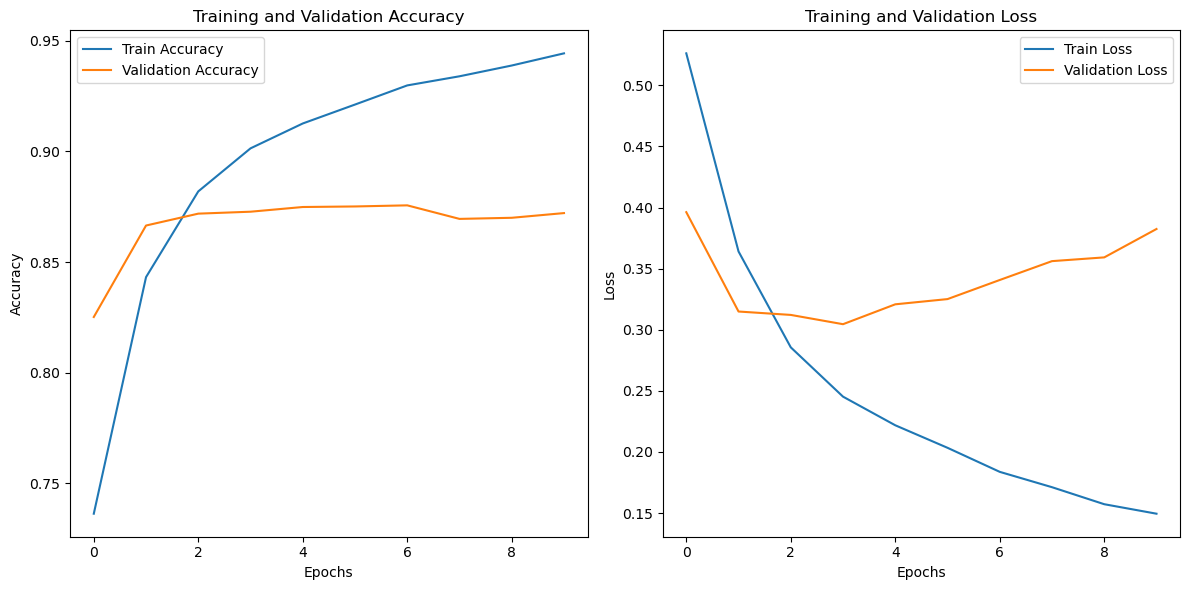

In [20]:



# Plotting the Training and Validation Loss and Accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

As we can see, our final model has solid and consistant results. 
However, there is a noticeable gap between training and validation accuracy, with the validation accuracy plateauing around 85%, indicating that the model might be overfitting. 

In conclusion, i would like to say that we have managed to produce a model that shows great accuracy and adequate training speed.
Let's take a look at the things that could be improved and things that i am fond of in this project.

To improve: 
1) I have not yet found a solution  that reduces the gap between training and validation accuracy.
2) I have tried several different approaches other than the ones included in this notebook. Most notebly a GRU layer instead of the LSTM. 
Unfortunately, I have not managed to get a good result.  
3) Maybe we could enhance the model by using pretrained embeddings.
4) Maybe we could use back translation to train the data on a larger and more varied dataset.

Things I like: I am generally satisfied with the results.